<h3>Stock Price Prediction of APPLE Company</h3>

<h3>For this we have to apply LSTM MachineLearning algorithm for predicting StockPrice of APPLE</h3>

<h3>Problem Statement :- We have to predict the future StockPrice of a particular company</h3>

<h3>Importing all the required libraries</h3>

In [1]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Dell\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


<h3>Checking the imported Data</h3>

In [2]:
#Get the stock quote
df = web.DataReader('AAPL',data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.112915
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.283928
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.198540


<h3>Checking the size of Data</h3>

In [3]:
#getting the no.of rows and columns
df.shape

(2003, 6)

<h3>Visualizing the actual StockPrice across years</h3>

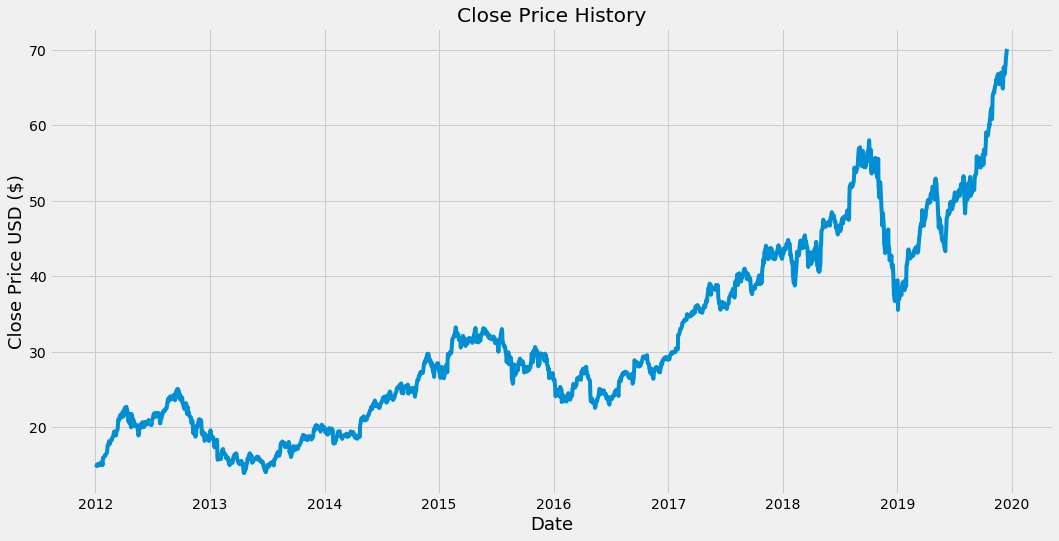

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

<h3>Acquiring the close value of everyday</h3>

In [5]:
#create a new dataframe with only the Close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

In [6]:
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [7]:
training_data_len

1603

<h3>Scaling the Data</h3>

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

<h3>Preparing the Training Data</h3>

In [9]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

<h3>Checking the Training Data</h3>

In [10]:
x_train

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
        0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
        0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
        0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
        0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
        0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
        0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
        0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
        0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
        0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
        0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
        0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805]),
 array([0.01457063, 0.01748985, 0.02026915, 0.01984303, 0.02080338,
        0.02036454, 0.01962679, 0.01862191, 0.02173194, 0.02453668,
        0.02367172, 0.01893355, 0.02345548, 0.

In [11]:
y_train

[0.13949272033425864,
 0.13293562570222134,
 0.1450704115800499,
 0.15186917276638368,
 0.14868284255435876,
 0.15464213938518467,
 0.15626390368145965,
 0.15130951854078373,
 0.14988489165577185,
 0.14770340520232855,
 0.1365480566765302,
 0.12058461364243195,
 0.13939095884491604,
 0.13852602015128834,
 0.12523371431508012,
 0.11603724049334213,
 0.11522314857860155,
 0.10796010908858827,
 0.13958174465454132,
 0.13811897419391805,
 0.13512978139315623,
 0.12303317305672323,
 0.12185659829342993,
 0.12430515770772121,
 0.12165942691638265,
 0.11112099892827759,
 0.11381125886264959,
 0.11298446374463328,
 0.11362043908724018,
 0.11447267457759214,
 0.1120495555356365,
 0.10664994689619473,
 0.10343817631183416,
 0.09892898070413991,
 0.08877850990270736,
 0.08894385533999699,
 0.10859608443119523,
 0.10585497771793612,
 0.11449814891571197,
 0.11116552807131103,
 0.10923844534122418,
 0.11558566539293841,
 0.11997404470637651,
 0.11905822526807747,
 0.10841165022320787,
 0.1105104299

<h3>Converting these training Data to numpy arrays</h3>

In [12]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

<h3>Building LSTM Model</h3>

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss ='mean_squared_error')

<h3>Training the Model</h3>

In [16]:
model.fit(x_train, y_train, batch_size =1,epochs=1)

Epoch 1/1
1543/1543 [==============================] - 43s 28ms/step - loss: 7.5032e-04


<h3>Testing the Model</h3>

In [17]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
#get the models predicated price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.5762839794158936

<h3>Solution</h3>

<h3>Visualizing the Actual and Predicted StockPrice</h3>

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


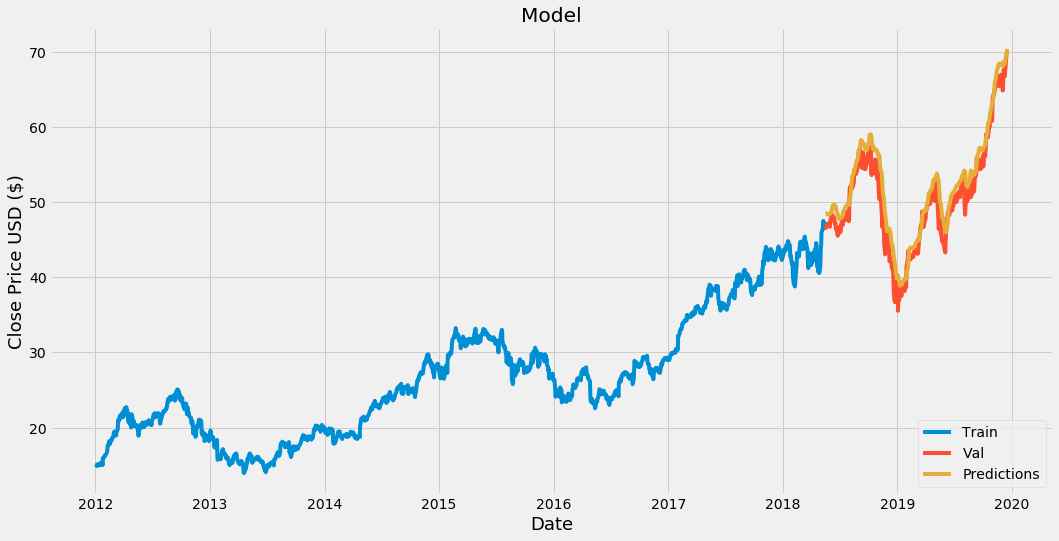

In [22]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize =18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'],loc='lower right')
plt.show()

In [23]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,48.486038
2018-05-18,46.577499,48.495384
2018-05-21,46.907501,48.437824
2018-05-22,46.790001,48.402416
2018-05-23,47.090000,48.363918
...,...,...
2019-12-11,67.692497,68.882561
2019-12-12,67.864998,69.158325
2019-12-13,68.787498,69.445396


<h3>Predicting the StockPrice of a new Day</h3>

In [24]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df =apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to a an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test =[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#GET the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[70.96083]]


<h3>Conclusion</h3>

In [25]:
#get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo',start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
